# IEKF

In [1]:
%config Completer.use_jedi = False

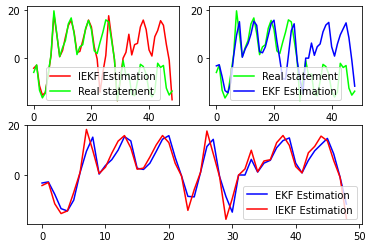

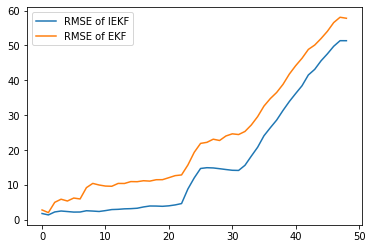

In [2]:
import numpy as np
T = 50 # 进行50次
Q = 1
R = 1
x = np.random.normal(0.1,1) # 初值
P = 1 # 初始协方差
xe = x
itr = 20

f = lambda x: 0.5*x + 25 * (x/(1+x**2))
h = lambda x: (x**2)/20

fg = lambda x: 0.5+ 25*((1-x**2)/(1+x**2)**2)
hg = lambda x: x/10

real = []
estimations_iekf = []
estimations_ekf = []
RMSE_ekf = []
rmse_ekf = 0
RMSE_iekf = []
rmse_iekf = 0
for t in range(1,T):
    x = 0.5 * x + 25 * x / (1 + x ** 2) + 8*np.cos(t-1) + np.random.normal(0,Q)
    z = xe ** 2 / 20 + np.random.normal(0,R)
    real.append(x)
    # prediction
    F = fg(xe)
    xe = f(xe) + 8*np.cos(t-1)
    P = F*P*F + Q
        
    # update
    x_hat = xe
    for i in range(itr):
        H = hg(xe)
        S = H*P*H + R
        K = P*H*(1/S)
        W = K*(z-h(xe)-H*(x_hat-xe))
        xe = x_hat + W
        if i == 0:
            xe_ekf = xe
            estimations_ekf.append(xe_ekf)
        P = (1-K*H)*P
    rmse_iekf = rmse_iekf + abs(xe-x)
    RMSE_iekf.append(np.sqrt(rmse_iekf**2/t))
    estimations_iekf.append(xe)
    rmse_ekf = rmse_ekf + abs(xe_ekf-x)
    RMSE_ekf.append(np.sqrt(rmse_ekf**2/t))
    
import matplotlib.pyplot as plt
plt.figure(1)
'''
意思是在一个2行2列共4个子图的图中，定位第1个图来进行操作（画图）。
最后面那个1表示第1个子图。那个数字的变化来定位不同的子图
'''
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)
#选择ax1
plt.sca(ax1)
plt.plot(range(len(estimations_iekf)), estimations_iekf, label = 'IEKF Estimation',color = 'r')
plt.plot(range(len(real)), real, label = 'Real statement',color = 'lime')
plt.legend()
#选择ax2
plt.sca(ax2)
plt.plot(range(len(real)), real, label = 'Real statement',color = 'lime')
plt.plot(range(len(estimations_ekf)), estimations_ekf, label = 'EKF Estimation',color = 'b')
plt.legend()
#选择ax3
plt.sca(ax3)
plt.plot(range(len(estimations_ekf)), estimations_ekf, label = 'EKF Estimation',color = 'b')
plt.plot(range(len(estimations_iekf)), estimations_iekf, label = 'IEKF Estimation',color = 'r')
plt.legend()
plt.show()

plt.plot(RMSE_iekf,label='RMSE of IEKF')
plt.plot(RMSE_ekf,label='RMSE of EKF')
plt.legend()